In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv("D:\\Assignment\\Customers.csv")
products = pd.read_csv("D:\\Assignment\\Products.csv")
transactions = pd.read_csv("D:\\Assignment\\Transactions.csv")


In [ ]:
# Info
print("Customers Data:")
print(customers.info())
print("\nProducts Data:")
print(products.info())
print("\nTransactions Data:")
print(transactions.info())

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null

In [4]:
# Data Preprocessing
# Missing Values
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:

print("\nDuplicate Records:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Duplicate Records:
Customers: 0
Products: 0
Transactions: 0


In [6]:
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

merged_df = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

print("\nSummary Statistics:")
print(merged_df.describe())


Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023

C:\Users\Nithin Sachin\AppData\Local\Temp\ipykernel_9840\3030846595.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


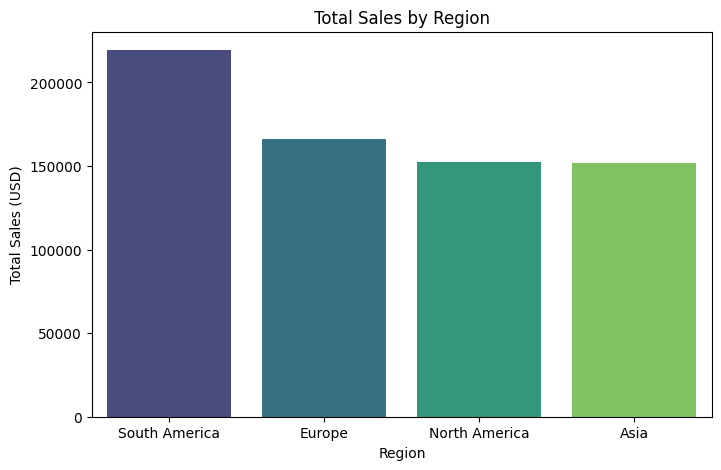

In [7]:
# Exploratory Data Analysis

# Total Sales per Region
region_sales = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.show()

C:\Users\Nithin Sachin\AppData\Local\Temp\ipykernel_9840\622837956.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_consumer.values, y=top_consumer.index, palette="viridis")


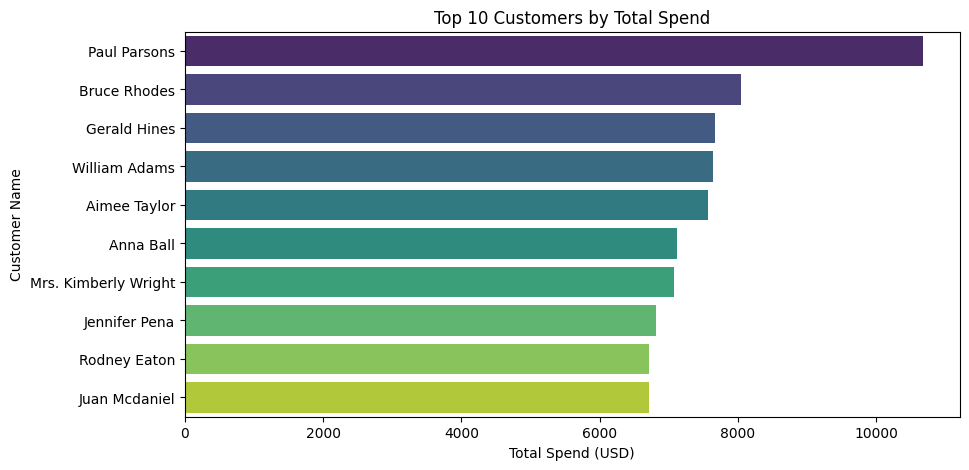

In [8]:
# Top 10 Customers by Total Spend
top_consumer = merged_df.groupby("CustomerName")["TotalValue"].sum().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_consumer.values, y=top_consumer.index, palette="viridis")
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Total Spend (USD)")
plt.ylabel("Customer Name")
plt.show()

C:\Users\Nithin Sachin\AppData\Local\Temp\ipykernel_9840\283042175.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_products.values, y=best_products.index, palette="magma")


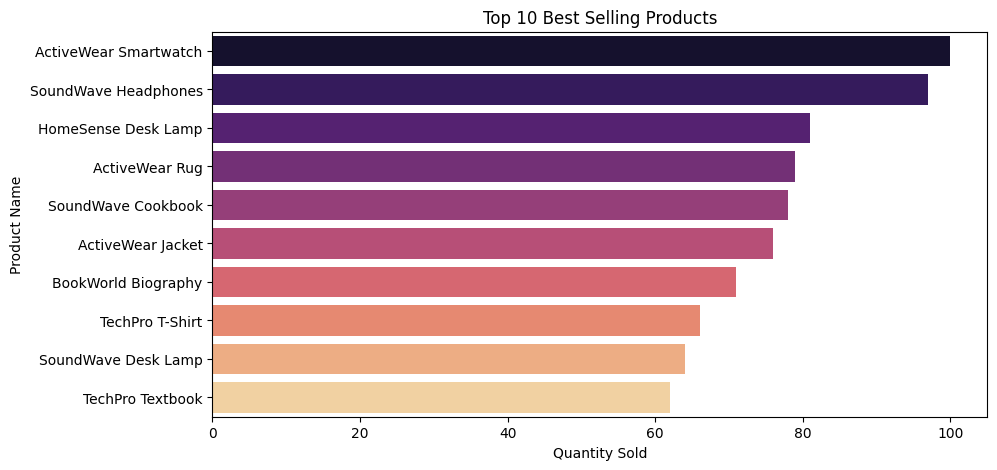

In [9]:
# Best Selling Products
best_products = merged_df.groupby("ProductName")["Quantity"].sum().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=best_products.values, y=best_products.index, palette="magma")
plt.title("Top 10 Best Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

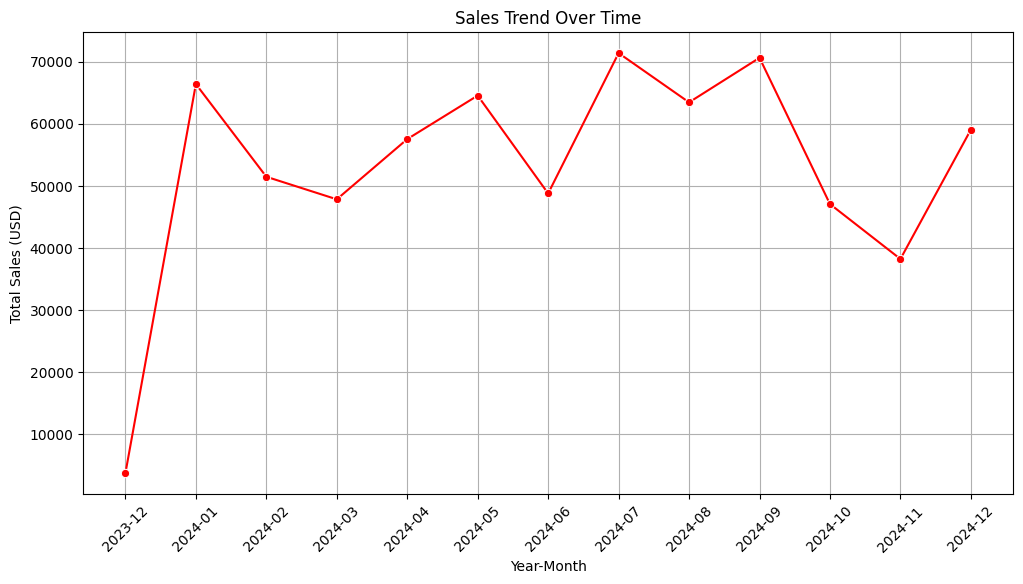

In [10]:
# Sales Trend Over Time
merged_df["YearMonth"] = merged_df["TransactionDate"].dt.to_period("M")
sales_trend = merged_df.groupby("YearMonth")["TotalValue"].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x=sales_trend.index.astype(str), y=sales_trend.values, marker="o", color="r")
plt.title("Sales Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\Nithin Sachin\AppData\Local\Temp\ipykernel_9840\2881780371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="coolwarm")


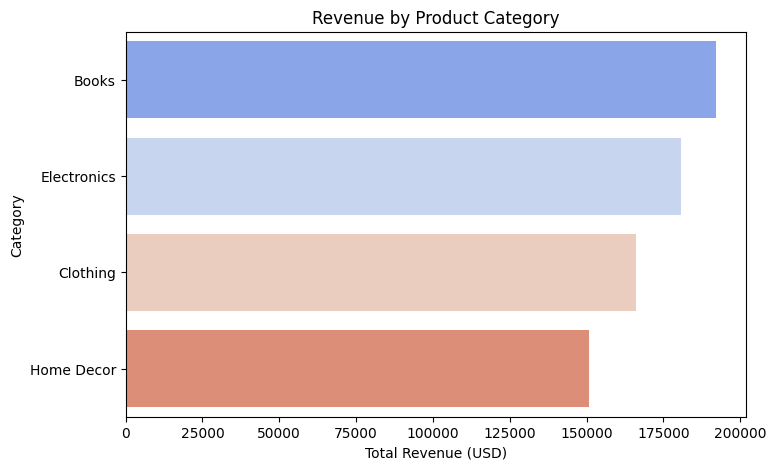

In [11]:
# Top Categories by Revenue
top_categories = merged_df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="coolwarm")
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.show()